In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

import scipy.stats as stats


In [2]:
def solveForRoots(a1, a2, b1, b2):
    t1 = 2 * b1 - 1
    t2 = 2 * b2
    c1 = 1 / t1 / t2
    c2 = a2 / b1 - a1 / b2
    temp1 = (2 * b1) - a2 ** 2
    temp2 = (2 * b2) - np.log(b2 ** 0.5 / b1 ** 0.5)
    c3 = a1 ** 2 / temp1 / temp2
    ans = np.roots([c1, c2, c3])
    return ans

In [3]:
#Reading Dataset
dataset = pd.read_csv("dataset_FLD.csv")
X=dataset.iloc[:,:].values
X0,X1,Y0,Y1=[],[],[],[]
print(X)
l = X.shape[1]-1
r = X.shape[0]-1

for x in X :
    if x[l]==0 :
        X0.append(x[0:l])
        Y0.append(x[l])
    else :
        X1.append(x[0:l])
        Y1.append(x[l])

        
X0=np.array((X0))
r1 = np.shape(X0)[0]

X1=np.array((X1))
r2 = np.shape(X1)[0]

# print(X0)
Y0=np.transpose([Y0])
Y1=np.transpose([Y0])


#mean of postive and negative Examples
m1 = np.sum(X0, axis=0, keepdims=True)/r1
m2 = np.sum(X1, axis=0, keepdims=True)/r2

[[ 1.67559763  0.61499432 -0.97160014  0.        ]
 [-4.03905804  0.33510238  0.54461753  1.        ]
 [ 0.79352602 -0.23527668  0.55177053  1.        ]
 ...
 [-0.81442967 -0.6939448   0.87677634  1.        ]
 [-0.32512155 -0.75902371  1.29977242  1.        ]
 [-1.50343056 -0.26945838 -1.12438972  0.        ]]


In [4]:
#Finding Sw 
sw=0

for x in X0:
    sw = sw+np.matmul(np.transpose(x-m1), x-m1)/r1

for x in X1:
    sw = sw+np.matmul(np.transpose(x-m2), x-m2)/r2



In [5]:
#Getting w 
w = np.matmul(np.linalg.inv(sw), np.transpose(m1-m2));
#Projecting The Points
projected0= np.matmul(X0, w)
projected1= np.matmul(X1, w)
m1=np.mean(projected0)
m2=np.mean(projected1)

v2=np.var(projected1)
v1=np.var(projected0)


In [6]:
#Get Intersection
soltemp=solveForRoots(m1,m2,v1,v2)
sol=0
if ( soltemp[0]<m1 and soltemp[0]> m2 ) or (soltemp[0]<m2 and soltemp[0]>m1) :
    sol=soltemp[0];
else :
    sol=soltemp[1];

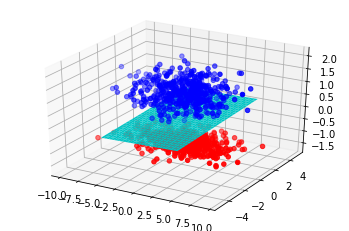

In [7]:
x=X0[:,[0]]
y=X0[:,[1]]
z=X0[:,[2]]
ax = plt.axes(projection="3d")
# Creating plot
ax.scatter3D(x, y, z, color="red")
x=X1[:,[0]]
y=X1[:,[1]]
z=X1[:,[2]]
ax.scatter3D(x,y,z,color="blue")

a,b,c,d = w[0],w[1],w[2],sol
x = np.linspace(-5,5,30)
y = np.linspace(-5,5,30)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

surf = ax.plot_surface(X, Y, Z,color="cyan")
plt.show()

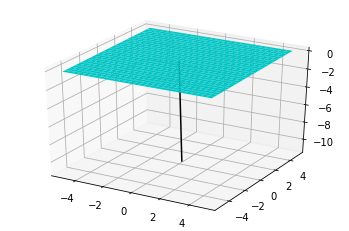

In [8]:
ax = plt.axes(projection="3d")
normal = ax.plot([0,w[0]],[0,w[1]],[0,w[2]],color="black")
surf = ax.plot_surface(X, Y, Z,color="cyan")
plt.show()

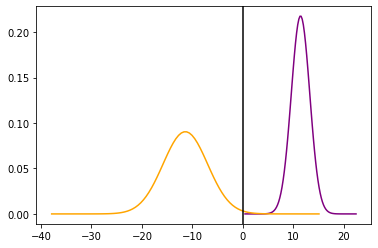

Intersection Point -  -0.006936843706526984


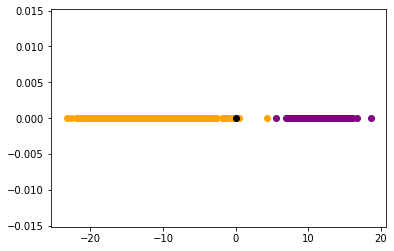

In [9]:
mu1 = m1
mu2 = m2
variance = v1
sigma = math.sqrt(variance)




x = np.linspace(mu1 - 6*sigma, mu1 + 6*sigma, 100)
norm1=plt.plot(x, stats.norm.pdf(x, mu1, sigma),color="purple")


variance = v2
sigma = math.sqrt(variance)
x = np.linspace(mu2 - 6*sigma, mu2 + 6*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu2, sigma),color="orange")
plt.axvline(x=sol,color="black")
plt.show()
x = np.linspace(-10,20, 100)
plt.scatter(projected0,np.zeros(np.shape(projected0)),color='purple')
plt.scatter(projected1,np.zeros(np.shape(projected1)),color='orange')
plt.scatter(sol,0,color='black')
print("Intersection Point - ",sol)
plt.show()


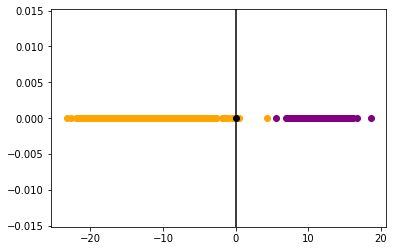

In [10]:
#1-D Discriminant
plt.scatter(projected0,np.zeros(np.shape(projected0)),color='purple')
plt.scatter(projected1,np.zeros(np.shape(projected1)),color='orange')
plt.scatter(sol,0,color='black')
plt.axvline(x=sol,color="black")
plt.show()

In [11]:
#Accuracy 
misclassified = 0
for i in projected1 :
    if i > sol:
        misclassified+=1
for i in projected0 :
    if i < sol:
        misclassified+=1
total = len(projected1)+len(projected0)
misclassified/=total
print("Accuracy - ",1-misclassified)

Accuracy -  0.995995995995996
